<a href="https://colab.research.google.com/github/FaustoJuarez/Data-Science-Journey/blob/main/River_Flow_Levels_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


def load_data():
    return pd.read_csv('rivers_merged1.csv', sep = ';', header = 0,  parse_dates=True)

In [14]:
data = load_data()
data = data.dropna()
convert_dict = {'YEAR': str,
                'DOY': int, 
                'WS10M_MIN': float,
                'WS10M_MAX': float,
                'WS2M_MIN': float,
                'WS2M_MAX': float,
                'PS': float,
                'T2M': float,
                'TS': float,
                'RH2M': float,
                'T2M_RANGE': float,
                'QV2M': float,
                'PRECTOTCORR': float,
                'T2MDEW': float,
                'T2MWET': float,
                'T2M_MIN': float,
                'T2M_MAX': float
                }
data = data.astype(convert_dict)
data.head()

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX
0,2000,1,0.71,5.98,0.45,4.38,91.34,22.93,22.75,51.94,11.90,9.64,1.14,12.03,17.48,17.00,28.89
1,2000,2,0.43,4.66,0.19,3.45,91.27,23.31,23.73,52.62,12.09,9.89,1.36,12.36,17.83,17.59,29.68
2,2000,3,0.34,5.37,0.25,3.97,91.02,23.25,23.59,53.69,13.34,10.07,8.61,12.51,17.87,16.28,29.62
3,2000,4,0.30,4.49,0.16,3.38,91.12,23.72,24.30,56.31,11.98,10.80,3.46,13.69,18.70,17.45,29.43
4,2000,5,1.01,4.19,0.60,3.16,91.12,25.72,25.60,48.00,13.35,10.44,0.26,13.19,19.45,18.57,31.92


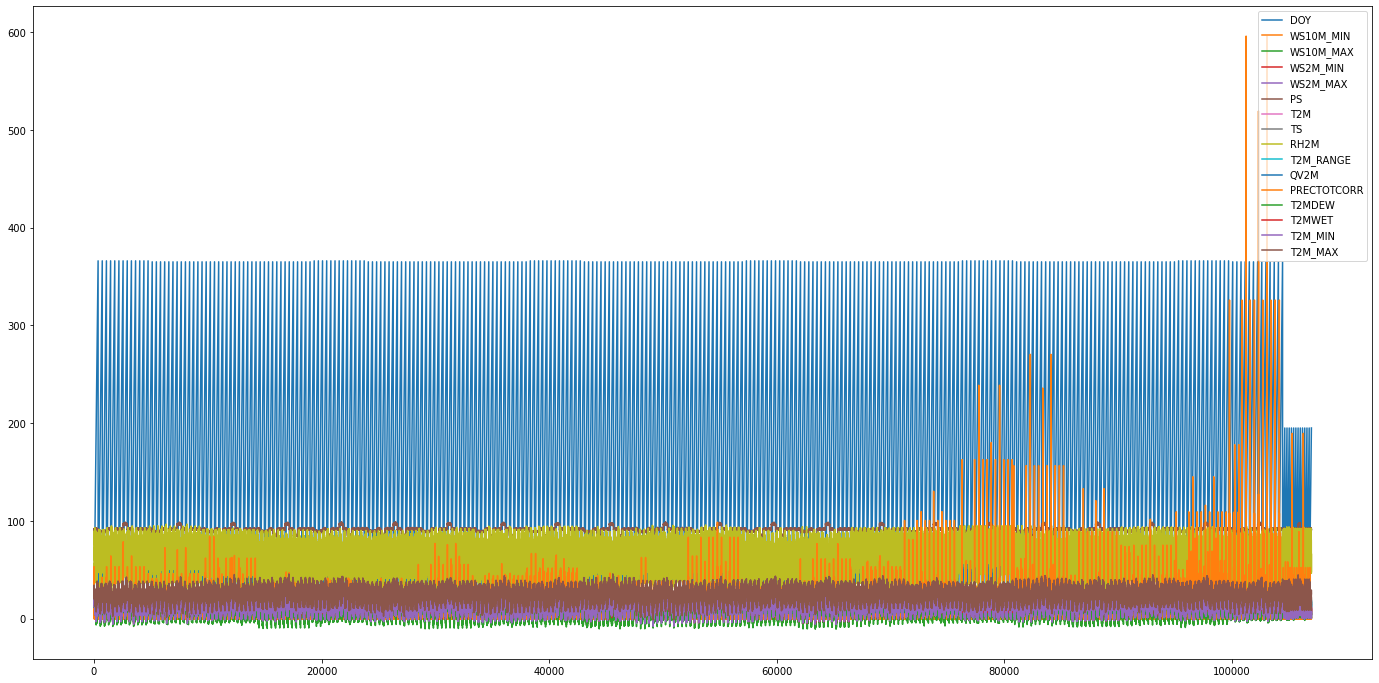

In [15]:
data.plot(figsize=(24,12))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
data.sort_index(inplace= True)
data.head()

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX
0,2000,1,0.71,5.98,0.45,4.38,91.34,22.93,22.75,51.94,11.90,9.64,1.14,12.03,17.48,17.00,28.89
1,2000,2,0.43,4.66,0.19,3.45,91.27,23.31,23.73,52.62,12.09,9.89,1.36,12.36,17.83,17.59,29.68
2,2000,3,0.34,5.37,0.25,3.97,91.02,23.25,23.59,53.69,13.34,10.07,8.61,12.51,17.87,16.28,29.62
3,2000,4,0.30,4.49,0.16,3.38,91.12,23.72,24.30,56.31,11.98,10.80,3.46,13.69,18.70,17.45,29.43
4,2000,5,1.01,4.19,0.60,3.16,91.12,25.72,25.60,48.00,13.35,10.44,0.26,13.19,19.45,18.57,31.92


In [21]:
len(data)

107003

In [87]:
train = data['PRECTOTCORR'].iloc[:1000]
test = data['PRECTOTCORR'].iloc[1000:2000]

In [59]:
train.head()

0    1.14
1    1.36
2    8.61
3    3.46
4    0.26
Name: PRECTOTCORR, dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [61]:
train = train.to_numpy().reshape(-1, 1)
test = test.to_numpy().reshape(-1, 1)


In [62]:
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [63]:
scaled_train[:10]

array([[0.02146893],
       [0.02561205],
       [0.16214689],
       [0.06516008],
       [0.00489642],
       [0.01148776],
       [0.0819209 ],
       [0.12655367],
       [0.03804143],
       [0.01412429]])

In [46]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [65]:
#Define generator
n_input = 365
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [66]:
X, y = generator[0]
print(f'Entrego al vector: \n{X.flatten()}')
print(f'Predice valor y: \n{y}')

Entrego al vector: 
[2.14689266e-02 2.56120527e-02 1.62146893e-01 6.51600753e-02
 4.89642185e-03 1.14877589e-02 8.19209040e-02 1.26553672e-01
 3.80414313e-02 1.41242938e-02 1.14877589e-02 3.65348399e-02
 7.98493409e-02 1.95856874e-01 1.00000000e+00 4.23728814e-01
 4.09416196e-01 1.88323917e-04 0.00000000e+00 1.31450094e-01
 5.36723164e-01 1.45762712e-01 1.67608286e-02 2.08851224e-01
 3.44632768e-02 5.64971751e-04 3.76647834e-04 1.37853107e-01
 4.18644068e-01 1.07532957e-01 1.88323917e-04 1.30131827e-01
 2.31261770e-01 5.08474576e-03 0.00000000e+00 1.64783427e-01
 2.33333333e-01 1.63465160e-01 3.27683616e-02 1.12994350e-03
 2.63653484e-03 1.03766478e-01 2.53483992e-01 1.65348399e-01
 1.12994350e-02 1.88323917e-04 0.00000000e+00 2.07156309e-03
 1.19397363e-01 4.57627119e-01 2.51035782e-01 7.98493409e-02
 7.06214689e-02 1.21468927e-01 4.99058380e-02 1.33709981e-02
 5.12241055e-02 5.74387947e-02 0.00000000e+00 9.41619586e-04
 1.16760829e-02 9.03954802e-03 2.91902072e-02 1.15819209e-01
 1.6

In [67]:
X.shape

(1, 365, 1)

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [69]:
#Define model 
model = Sequential()
model.add(LSTM(100,activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [73]:
#Fit model
model.fit(generator, epochs=10)

Epoch 1/10
635/635 [==============================] - 346s 545ms/step - loss: 0.0066
Epoch 2/10
635/635 [==============================] - 349s 549ms/step - loss: 0.0065
Epoch 3/10
635/635 [==============================] - 349s 549ms/step - loss: 0.0063
Epoch 4/10
635/635 [==============================] - 344s 541ms/step - loss: 0.0064
Epoch 5/10
635/635 [==============================] - 342s 538ms/step - loss: 0.0063
Epoch 6/10
635/635 [==============================] - 340s 536ms/step - loss: 0.0062
Epoch 7/10
635/635 [==============================] - 342s 538ms/step - loss: 0.0064
Epoch 8/10
635/635 [==============================] - 342s 538ms/step - loss: 0.0061
Epoch 9/10
635/635 [==============================] - 365s 575ms/step - loss: 0.0062
Epoch 10/10
635/635 [==============================] - 345s 544ms/step - loss: 0.0061


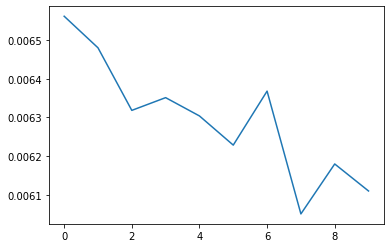

In [76]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [77]:
last_train_batch = scaled_train[-365:] #last year


In [78]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [79]:
model.predict(last_train_batch) #prediction first value test set

array([[0.00685565]], dtype=float32)

In [80]:
scaled_test[0] # actual first value test set

array([0.])

In [82]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  #append the prediction into the array
  test_predictions.append(current_pred)

  # use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [83]:
test_predictions

[array([0.00685565], dtype=float32),
 array([0.00841576], dtype=float32),
 array([0.00875984], dtype=float32),
 array([0.00884115], dtype=float32),
 array([0.00887271], dtype=float32),
 array([0.00890071], dtype=float32),
 array([0.00893015], dtype=float32),
 array([0.00895858], dtype=float32),
 array([0.00898386], dtype=float32),
 array([0.00900514], dtype=float32),
 array([0.0090224], dtype=float32),
 array([0.00903608], dtype=float32),
 array([0.00904673], dtype=float32),
 array([0.00905495], dtype=float32),
 array([0.00906125], dtype=float32),
 array([0.00906604], dtype=float32),
 array([0.00906967], dtype=float32),
 array([0.00907243], dtype=float32),
 array([0.00907451], dtype=float32),
 array([0.00907608], dtype=float32),
 array([0.00907727], dtype=float32),
 array([0.00907816], dtype=float32),
 array([0.00907884], dtype=float32),
 array([0.00907934], dtype=float32),
 array([0.00907973], dtype=float32),
 array([0.00908002], dtype=float32),
 array([0.00908023], dtype=float32),
 a

In [85]:
true_predictions = scaler.inverse_transform(test_predictions)

In [88]:
test['predictions'] = true_predictions

In [89]:
test.plot(figsize=(12,6))

TypeError: ignored